In [8]:
from igraph import Graph
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
edges = []
# Read the data
with open('../Data_Q7/socialmedia.graph.txt', 'r') as file:
    for line in file.readlines()[2:]:
        node1, node2 = map(int, line.strip().split('\t'))
        edges.append((node1, node2))


In [3]:
# 创建无向图
g = Graph(edges=edges, directed=False)
g.delete_vertices(0)

In [4]:
# a. 计算和绘制聚类系数
clustering_coefficient = g.transitivity_undirected()
print("Average Clustering Coefficient:", clustering_coefficient)

Average Clustering Coefficient: 0.006218559818028638


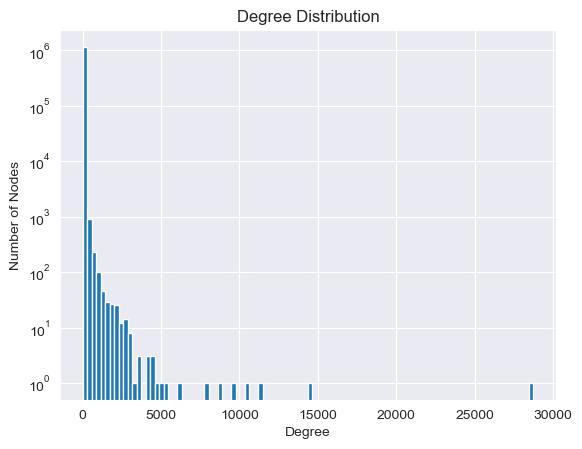

In [5]:
# 绘制度分布的对数直方图
plt.hist(g.degree(), bins=100, log=True)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()

In [4]:
# Calculate degree centrality for all nodes
degrees = g.degree()

In [5]:
# Identify the most influential nodes
# Choose the number of nodes to display
top_n = 50

# Get the indices of the top n nodes
top_nodes = sorted(range(len(degrees)), key=lambda i: degrees[i], reverse=True)[:top_n]
top_centrality_values = [degrees[i] for i in top_nodes]

# Print the results
print("The most influential nodes:", top_nodes)
print("Their degree centrality:", top_centrality_values)

The most influential nodes: [1071, 362, 35660, 105, 482708, 663930, 928, 807, 27836, 108623, 2686, 663605, 2632, 1845, 479, 831, 1244, 1190, 2525, 663559, 802, 3424, 44005, 115673, 383, 21170, 155431, 4718, 115240, 516, 8745, 110104, 105477, 1431, 280435, 664788, 697671, 3, 772, 103, 209, 310, 20363, 2782, 2538, 27801, 340, 1489, 687, 27543]
Their degree centrality: [28754, 14641, 11281, 10461, 9762, 8843, 7917, 6102, 5393, 4899, 4877, 4422, 4364, 4352, 4253, 4217, 4044, 3707, 3621, 3506, 3394, 3160, 3114, 3100, 3035, 3024, 2992, 2956, 2924, 2866, 2866, 2837, 2830, 2818, 2800, 2799, 2763, 2753, 2742, 2720, 2634, 2628, 2591, 2535, 2504, 2488, 2464, 2444, 2400, 2380]


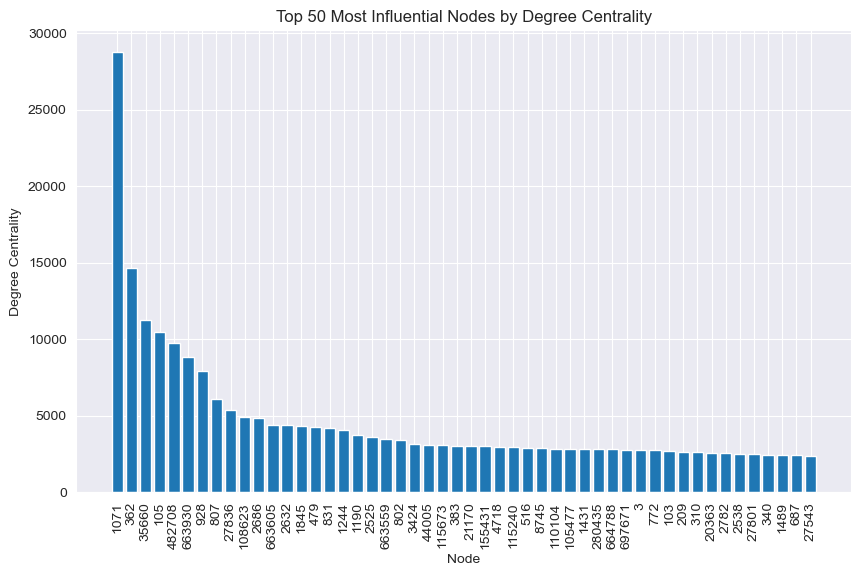

In [6]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_centrality_values, tick_label=top_nodes)
plt.title('Top {} Most Influential Nodes by Degree Centrality'.format(top_n))
plt.xlabel('Node')
plt.xticks(rotation=90)
plt.ylabel('Degree Centrality')
plt.show()

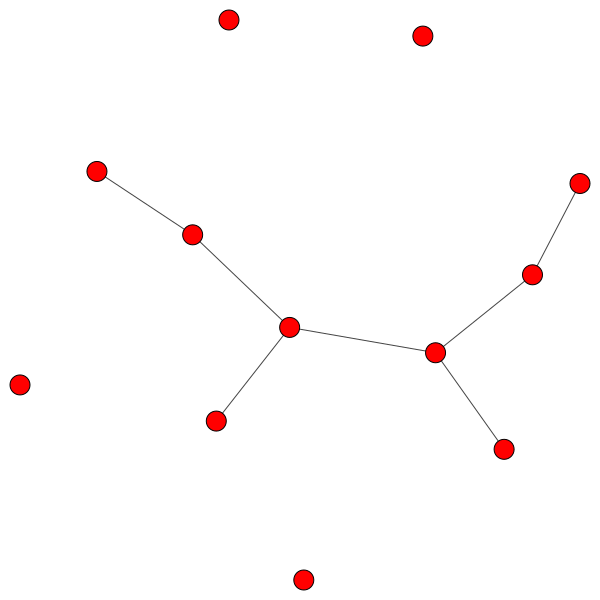

In [9]:
# # 展示节点1071的邻居节点
# print("The neighbors of node 1071:", g.neighbors(1071))

# 绘制节点1071的邻居节点
g_sub = g.subgraph(g.neighbors(2))
ig.plot(g_sub, bbox=(600, 600))

In [ ]:
# Identify the isolated nodes
isolated_nodes = [node for node, degree in enumerate(degrees) if degree == 0]

In [ ]:
# Print the number of isolated nodes and show 50 of them
num_isolated_nodes = len(isolated_nodes)
print("Number of Isolated Nodes:", num_isolated_nodes)
print("50 of them:", isolated_nodes[:50])

plt.figure(figsize=(6, 6))
plt.pie([num_isolated_nodes, len(degrees) - num_isolated_nodes], labels=['Isolated Nodes', 'Non-Isolated Nodes'], autopct='%1.1f%%')
plt.title('The Proportion of Isolated Nodes')
plt.show()

In [ ]:
# Get the all connected components
connected_components = g.connected_components()

In [ ]:
# Get the sizes of all connected components
num_components = len(connected_components)
print("The number of connected components:", num_components)

# Number of components with size > 1
num_nontrivial_components = sum([1 for component in connected_components if len(component) > 1])
print("The number of nontrivial connected components:", num_nontrivial_components)

# The size of the largest component
component_sizes = connected_components.sizes()
largest_component_size = max(component_sizes)
print("The size of the largest component:", largest_component_size)

In [ ]:
# Since only one component has size > 1, we can get the largest component by using the giant() method
largest_component = g.connected_components().giant()

In [ ]:
# Calculate the average shortest path length
avg_shortest_path_length = largest_component.average_path_length()
print("The average shortest path length:", avg_shortest_path_length)

In [ ]:
# Calculate the diameter
diameter = largest_component.diameter()
print("The diameter:", diameter)

In [ ]:
# community_multilevel
communities = g.community_multilevel()

In [ ]:
# 分析检测结果
num_communities = len(communities)
print("社区数量:", num_communities)

# 各社区的大小
community_sizes = communities.sizes()
print("各社区的大小:", community_sizes)